# Modern Machine Learning with SKLearn! 

This notebook will serve as part lecture and HW assignment! 

In this notebook we will introduce:

- the basic ML workflow for **supervised** problems
- make use of modern data and ML libraries like `pandas`, `sklearn` and `seaborn`

## Notebook setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('muted')

# styling additions
from IPython.display import HTML
# style = "<style>div.warn{background-color: #fcf2f2;border-color: #dFb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;}</style>"
style = "<style>div.info{padding: 15px; border: 1px solid transparent; border-left: 5px solid #dfb5b4; border-color: transparent; margin-bottom: 10px; border-radius: 4px; background-color: #fcf8e3; border-color: #faebcc;}</style>"
HTML(style)

# Exploratory Data Analysis

Before jumping in, lets first start with a basic dataset and spend a few minutes introducing us to the basics of **exploratory data analysis** (EDA) and two very powerful libraries for data manipulation and plotting: `pandas` and `seaborn`

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  As with `matplotlib` before, we can spend an entire course just teaching one of these libraries. Instead, we will just "hit-the-ground-running" and learn them by example. 

</div>

## Dealing with Data: `Pandas`

You can think of the `pandas` library as "Excel-for-Python"


[![](../assets/pandas.jpg)](https://pandas.pydata.org/)

It lets you manipulate data of different types much like you would in excel, dealing with columns, rows, headers, formulas on pieces of it, etc. Big parts of plotting libraries and even ML libraries like SKlearn are being extended to work directly with pandas.

The core item that pandas gives us is called a **dataframe**:

<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  A `pandas` **dataframe** is a pandas object that "wraps" our raw data and gives us plenty of useful features. When you hear **dataframe**, you can think of an Excel **spreadsheet**.

</div>

Lets load the `iris` dataset from our last HW assignment in as a `pandas` dataframe!

In [2]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)   # recall - returns a Bunch object
iris_df = iris.data
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Oh wow! So we already get this nice pretty printing with column names for free! 

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  A common convention (though by no means universal) is to name `dataframe` variables with the subscript `_df`, so we're clear about what it is!

</div>


All of this is great, and it will make a bunch of manipulations much simpler for us down the road, but never forget that this is just **wraps** the actual data. It is always available using the `.values` attribute! 

In [3]:
iris_df.values[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

That looks familiar! And indeed it should be! Its the same `numpy` array we used on the last HW!

In [4]:
type(iris_df.values)

numpy.ndarray

What about the labels? Well the `Bunch` object above has this under the name `iris.target` so lets check that out

In [5]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

This is a `pandas` `Series` object. You can think of this as a single **column** (or row) in Excel.

Lets **join** these two objects by **adding a new column** to our `dataframe` called `Species`:

In [6]:
iris_df['Species'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Lets change this though:

In [7]:
label_name_dict = {val:key for key,val in zip(iris.target_names,range(3))}
iris_df['Species'] = iris_df['Species'].map(label_name_dict)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Wow that was easy! 

Lets also keep our `features` and `labels` separate for later though, by using the dataframe `.iloc` indexing scheme:

```python
df.iloc[row_num:column_num]
```

This looks a lot like `numpy` indexing scheme, and that is by design! This lets you **index** into a dataframe like it was an array

In [8]:
iris_df.iloc?

Lets use this to say "give me everything but that last column":

In [9]:
iris_df.iloc[:,:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


This our **dataset matrix**, so lets save it for later:

In [10]:
X = iris_df.iloc[:,:4].values
X.shape

(150, 4)

And do the same for our labels:

In [11]:
y = iris.target.values
y.shape

(150,)

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  There are many ways we could have gotten here, including directly from the `Bunch` object. We just have this wrapped up in a single dataframe because it makes our plotting easier!

</div>

## Visualizing Our Data with `Seaborn`

Now we're ready to introduce the excellent `seaborn` library! This is a "statistical data visuzliation" library that lets make "advanced" plots much easier! It is built **ontop** of `matplotlib`. Indeed, it uses `matplotlib` inside to make all the plots. It just makes it easier for us, the programmer.

[![](../assets/seaborn.jpg)](https://seaborn.pydata.org/examples/index.html)

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  Spend some time checking out [their gallery!](https://seaborn.pydata.org/examples/index.html)

</div>


Lets use this to explore our dataset! We will build up a sophisticated plot called a **scatter-plot**(**scatter-matrix**) piece by piece.

Lets start with a basic **histogram** and use `seaborn`'s 

```python
sns.distplot
``` 

function:

In [12]:
sns.distplot?

Lets use it to make a histogram of our `sepal length` feature:

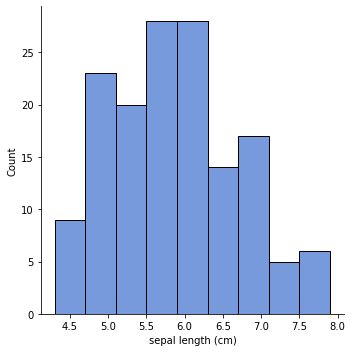

In [13]:
sns.displot(iris_df, x='sepal length (cm)');

Note - in one line, we make a plot with proper labels using just the `iris` dataframe and the name of the column we want to plot.

This is a histogram of all `sepal length` values in our dataset. Its useful, but we should be able to do better. 

We can! We can use the `hue` parameter to color this by the **class-label**!

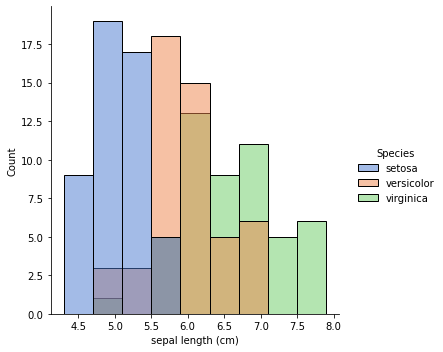

In [14]:
sns.displot(iris_df, x='sepal length (cm)',hue='Species');

Much better! What do we think about this one? 

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Comment about this plot below!

</div>

---

---

Lets keep going - this histograms overlap and that might make it hard to see - lets have `seaborn` automatically estimate a smooth function to fit these histograms. These are called `Kernel Density Estimates` (KDE) and are built in to `seaborn` through the `kind` parameter:

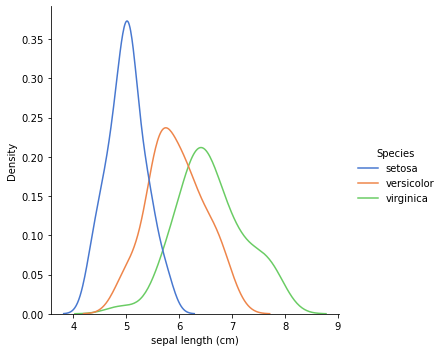

In [15]:
sns.displot(iris_df, x='sepal length (cm)',hue='Species',kind='kde');

Much better! Lets also check out one for `sepal width`:

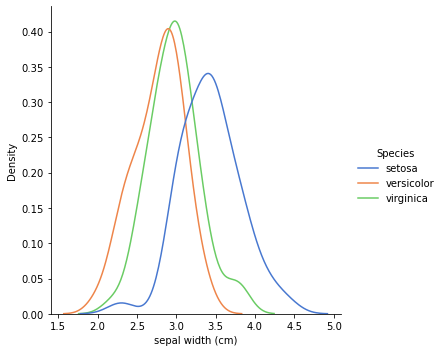

In [16]:
sns.displot(iris_df, x='sepal width (cm)',hue='Species',kind='kde');

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Comment about this plot below!

</div>

---

---

Lets now make a **scatter plot** of these two features: 

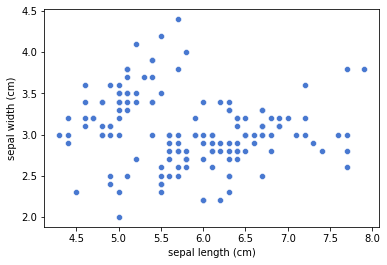

In [17]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)');

Ah! We forgot to ask `seaborn` to separate by class:

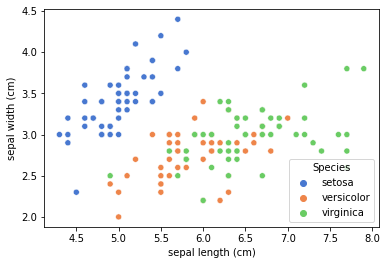

In [18]:
sns.scatterplot(data=iris_df, x='sepal length (cm)', y='sepal width (cm)', hue='Species');

Much better! Again - notice this is done in a single line! 

Lets build up a more complex graph by combining these:

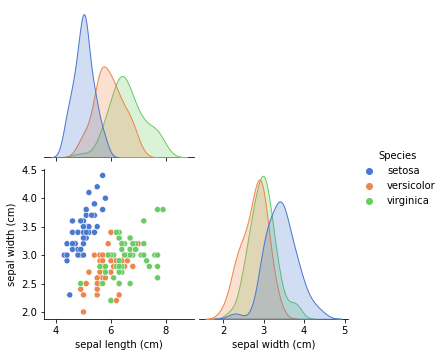

In [19]:
sns.pairplot(iris_df, vars=iris_df.columns[:2], hue='Species',corner=True, palette='muted',);

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Comment about this plot below!

</div>

---

---

Lets make one for `petal length` and `petal width` now:

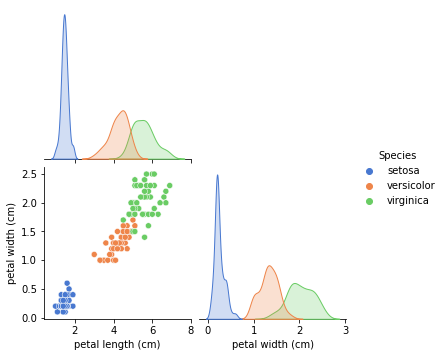

In [20]:
sns.pairplot(iris_df, vars=iris_df.columns[2:-1], hue='Species',corner=True, palette='muted',);

Wow great! Lets **combine all of them!**

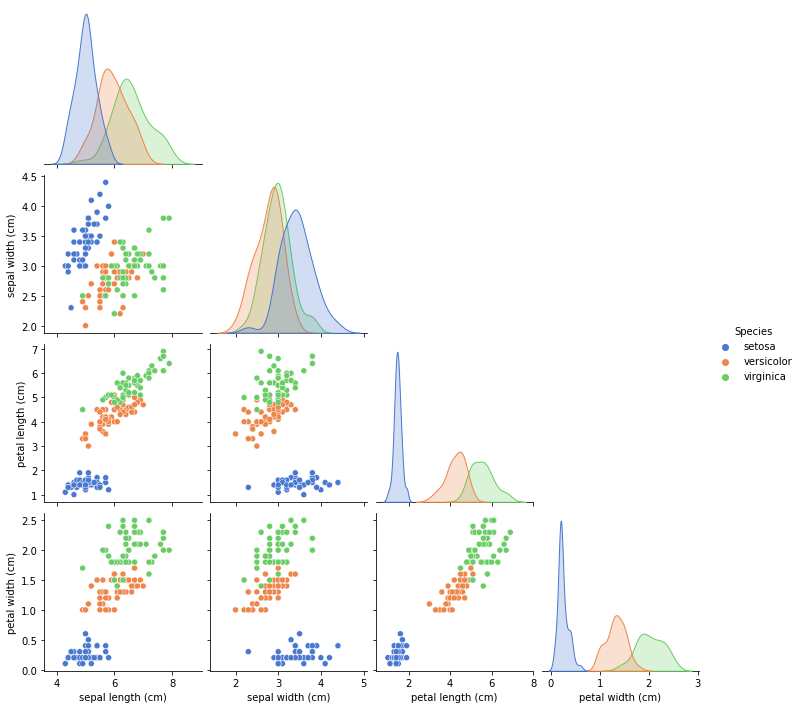

In [21]:
sns.pairplot(iris_df, vars=iris_df.columns[:-1], hue='Species',corner=True);

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Comment about this plot below!

</div>

---

---

<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  This image is also (confusingly) referred to as a **scatter-plot matrix**, and its a great way to get a glimpse at your entire dataset in one image.

</div>

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  In general, how many rows and columns would we expect for a dataset of size `(N,d)`?

</div>

---

---

In general, this image is sometimes shown as a **full matrix**, instead of the lower diagonal piece that we showed:

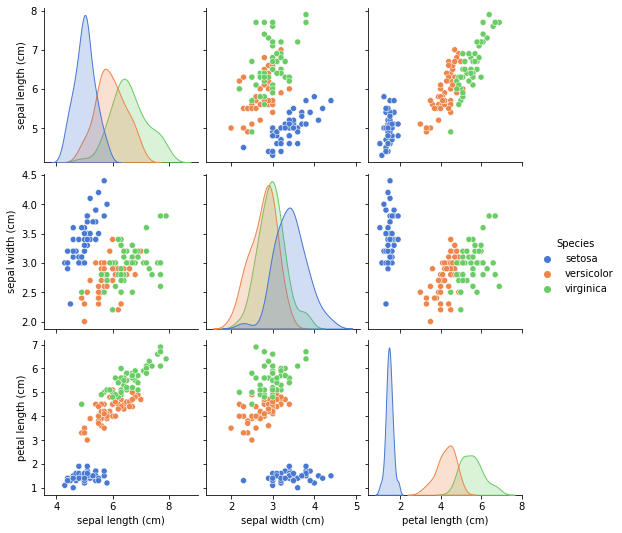

In [22]:
sns.pairplot(iris_df, vars=iris_df.columns[:-2], hue='Species');

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Comment on this image. Is it different than the lower-diagonal one we showed?

</div>

---

---

# SKLearn

sk-learn is Python's *premier* machine learning library. Its documentation is thorough, and it has a huge set of examples! If you spent enough time reading its excellent [user guide 🔗](https://scikit-learn.org/stable/getting_started.html), you could just teach yourself most of machine learning! 


[![](../assets/sklearn.jpg)](https://scikit-learn.org/stable/index.html#)

Not only that, I learned most of matplotlib by just looking at sklearn's example gallery! 


<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:**  While sklearn has many state of the art machine larning algorithms implemented, it is **not** a **Deep Learning** (Neural Networks) library! There are other libraries for that.

</div>

## ML Workflow

In general, the ML workflow (for supervised problems) can be described as: 
![](../assets/ml-workflow.jpg)

We can use `sklean` to help us carry out almost all (if not all) pieces of this pipeline.

## Split our data

The image above starts with **two datasets** - a **training dataset** and a **testing dataset**. We will discuss the theoretical basis for this later on in class, but for now lets just give them a working definition:

<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  A **training set/dataset** is the data used for **training** a machine-learning algorithm. 

</div>


<br/>
<div class='info'>

<font size='5'>📖</font> **Definition:**  A **testing set/dataset** is the data used for **evaluating** a machine-learning algorithm **at the very end**.

</div>

For the testing set we give a very important caveat: 

<div class="alert alert-block alert-danger">
    
<font size='5'>⚠️</font><b>Warning:</b> The **testing set** is not to be used to help select between different models or parameters! If you use the testing set in anyway to improve a model, you have introduced a **bias** (more on this later). 

</div>
    

Lets use the handy `train_test_split` method in `sklearn.model_selection` to quickly split the dataset for us:

In [23]:
from sklearn.model_selection import train_test_split
train_test_split?

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:** Two very important but often overlooked parameters are `shuffle` and `stratify` 

</div>

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3,
                                                    random_state=123,
                                                    shuffle=True,
                                                    stratify=y)

<br/>
<div class='info'>

<font size='5'>☝🏽</font> **Note:** We are using **tuple unpacking** on the left-hand side there to "unpack" the return value into 4 separate variables.
</div>

Lets check their sizes:

In [25]:
print(f'Training data: X_train: {X_train.shape}, y_train: {y_train.shape}')
print(f'Testing data:  X_test:  {X_test.shape},  y_test:  {y_test.shape}')

Training data: X_train: (105, 4), y_train: (105,)
Testing data:  X_test:  (45, 4),  y_test:  (45,)


Seems right! More importantly, lets check how many of each class made it into the split:

In [26]:
np.bincount(y)

array([50, 50, 50])

In [27]:
np.bincount(y_train), np.bincount(y_test)

(array([35, 35, 35]), array([15, 15, 15]))

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Why do we need to make sure we take our label into account when doing this split? What could happen if we don't?

</div>

---

---

Now we're ready to use the training data to **train an actual ML algorithm.**

## SKLearn Estimator API

SKLearn was designed to have a very consistent API (Application Programming Interface). This means you can very easily switch to different algorithms and most of the rest of your code can remain unchanged. 


By design, (almost) all **estimators**, whether **regressors** or **classifiers** in SKLearn follow this API:

```python
class SupervisedEstimator(...):
    def __init__(self, hyperparam1, ...):
        self.hyperparam_1 = ...
        ...
    
    def fit(self, X, y):
        ...
        self.fit_attribute_ = ...
        return self
   
    def predict(self, X):
        ...
        return y_pred
    
    def score(self, X, y):
        ...
        return score
    
    def _private_method(self):
        ...
    
    ...

```

<br/>
<div class='info'>
    
<font size='5'>🤔</font> **Pause-and-Ponder:**  Lets make some comments on this in class, and amend your notes above and below based on this discussion

</div>

---

---

# K-Nearest Neighbor (`KNN`)

We're now ready to put all the above into practice! Lets start with a method we've discussed in class: the K-Nearest-Neighbor (KNN) algorithm.

In `sklearn` a KNN classifier is implemented in the `KNeighborsClassifier` class. Its documentation [can be found here 🔗](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), and there are more examples of it use in the [user guide 🔗](https://scikit-learn.org/stable/modules/neighbors.html#classification)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = 3
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)

## Training

Ok. Now lets put the API above into practice. Lets actually **train** this model!

In [29]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Wow that was fast! 

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Based on our class discussions, what does training a KNN actually do? Comment below!

</div>

---

---

Lets now use this to make **predictions** on unseen data!

## Making Predictions

After "fitting" the KNN model, we can now make predictions on new data points that the model has not seen before. The **test set** defined above is a good set of points! 

Of course, we have labels for the test set as well, but we only use these labels to **evaluate the model** -- i.e., we compare the predictions to the true labels in the test set in order to find out how good the model is:

In [30]:
y_pred = knn_model.predict(X_test)

## Evaluate how we did

Now we can see how good we did:

In [31]:
num_correct_predictions = (y_pred == y_test).sum()
accuracy = (num_correct_predictions / y_test.shape[0]) * 100

print(f'Test set accuracy: {accuracy:.2f}%')

Test set accuracy: 95.56%


Lets use the built in `score` method to do this for us!

In [32]:
print(f'Test set accuracy: {knn_model.score(X_test, y_test)*100:.2f}%')

Test set accuracy: 95.56%


## Visualize Decision Boundary

As we did in class, lets visualize the **decision boundary** of our KNN algorithm to see how we did.

To make things a bit easier for plotting, lets re-do the training with only 2 features:

In [50]:
# decision boundary plotting function
from matplotlib.colors import ListedColormap
def plot_decision_boundary(model, X, y, scale=1):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    h=0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h*scale))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    cmap = sns.palettes.color_palette('muted',as_cmap=True)
    cmap_light = ListedColormap(cmap[:3])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light,alpha=0.5);
    # Plot also the training points
    ax = sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y,
        alpha=1.0,
        edgecolor="black",
        palette='muted'
    )
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification with K = {n_neighbors}");
    plt.xlabel(iris.feature_names[feature_num]);
    plt.ylabel(iris.feature_names[feature_num+1]);
    handles,labels = ax.get_legend_handles_labels()
    ax.legend(handles, iris.target_names)

Test set accuracy: 80.00%


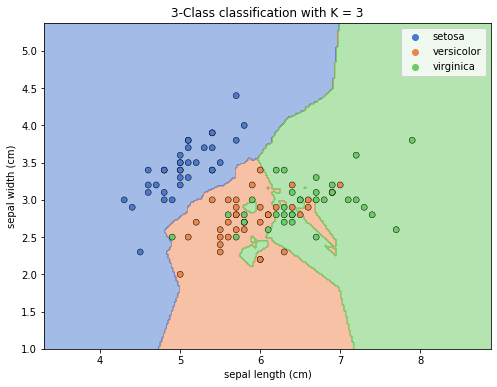

In [45]:
n_neighbors = 3
feature_num = 0      # for sepal
# feature_num = 2      # for petal

# Setup and train model
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
X_train_2 = X_train[:,feature_num:feature_num+2]
X_test_2 = X_test[:,feature_num:feature_num+2]
knn_model.fit(X_train_2,y_train);

# visualize boundary
plot_decision_boundary(knn_model,X_train_2,y_train)
print(f'Test set accuracy: {knn_model.score(X_test_2, y_test)*100:.2f}%')

<br/>
<div class='info'>

<font size='5'>🤔</font> **Pause-and-Ponder:**  Experiment with the above and jot down your observations below!

</div>

---

---

## Scale - experiment

Test set accuracy: 95.56%


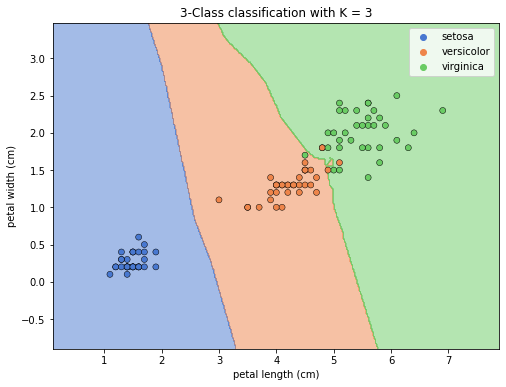

In [58]:
n_neighbors = 3
# feature_num = 0      # for sepal
feature_num = 2      # for petal
scale = 1

# Setup and train model
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
X_train_2 = X_train[:,feature_num:feature_num+2] * np.array([1,scale])
X_test_2 = X_test[:,feature_num:feature_num+2] * np.array([1,scale])
knn_model.fit(X_train_2,y_train);

# visualize boundary
plot_decision_boundary(knn_model,X_train_2,y_train,scale=max(1,scale/2))
print(f'Test set accuracy: {knn_model.score(X_test_2, y_test)*100:.2f}%')